# Building a Percolation Network

In [605]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Bond percolation on a square lattice

In [606]:
def grid_percolation(m, n, p, periodic=True, create_using=None):
    """Returns the two-dimensional percolated grid graph
    
    The percolated grid graph disconnected edges by probability p

    Parameters
    ----------
    m, n : int or iterable container of nodes
        If an integer, nodes are from `range(n)`.
        If a container, elements become the coordinate of the nodes.
    
    p : int
        Each connected edges from the lattice has probability p to be removed.

    periodic : bool or iterable
        If `periodic` is True, both dimensions are periodic. If False, none
        are periodic.  If `periodic` is iterable, it should yield 2 bool
        values indicating whether the 1st and 2nd axes, respectively, are
        periodic.

    create_using : NetworkX graph constructor, optional (default=nx.Graph)
        Graph type to create. If graph instance, then cleared before populated.
    """
    G = nx.grid_2d_graph(m, n, periodic, create_using)
    for e in G.edges:
        if np.random.random() < p:
            n1, n2 = e[0], e[1]
            G.remove_edge(n1, n2)
    return G


In [607]:
def plot_grid_percolation(G):
    """Plot """
    x1, y1 = (np.array(list(G.nodes)).T)[0], (np.array(list(G.nodes)).T)[1]
    x2, y2 = [], []
    m, n = list(G.nodes)[-1][0], list(G.nodes)[-1][1]
    for e in list(G.edges):
        n1, n2 = e[0], e[1]
        # if top row connect with the bottom row
        if (n1[1] == 0 and n2[1] == n) or (n2[1] == 0 and n1[1] == n):
            x2.append(n1[0])
            y2.append(n1[1])
            x2.append(n1[0])
            y2.append(n1[1] - 1/2)

            x2.append(n2[0])
            y2.append(n2[1])        
            x2.append(n2[0])
            y2.append(n2[1] + 1/2)
        # if the left column connect with the right column
        elif (n1[0] == 0 and n2[0] == m) or (n2[0] == 0 and n1[0] == m):
            x2.append(n1[0])
            y2.append(n1[1])
            x2.append(n1[0] - 1/2)
            y2.append(n1[1])

            x2.append(n2[0])
            y2.append(n2[1])
            x2.append(n2[0] + 1/2)
            y2.append(n2[1])
        
        else:
            x2.append(n1[0])
            x2.append(n2[0])
            y2.append(n1[1])
            y2.append(n2[1])

    plt.plot(x1, y1, "o")
    for i in range(0, len(x2), 2):
        plt.plot([x2[i], x2[i+1]], [y2[i], y2[i+1]], color="k")
    plt.axis("off")

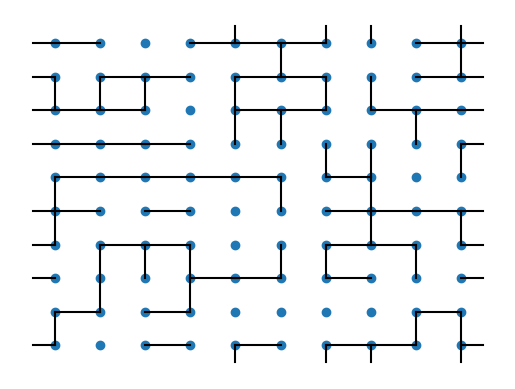

In [608]:
m, n, p = 10, 10, 0.6
G = grid_percolation(m, n, p)
plot_grid_percolation(G)

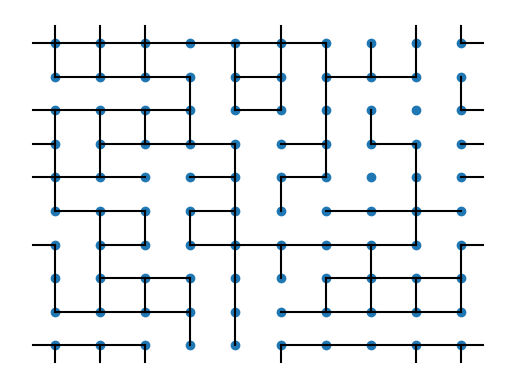

In [609]:
m, n, p = 10, 10, 0.4
G = grid_percolation(m, n, p)
plot_grid_percolation(G)

## Finding the clusters

11


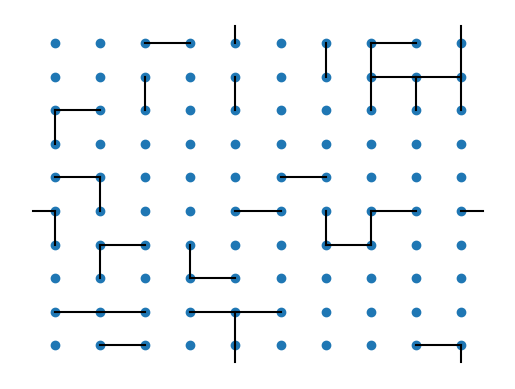

In [610]:
m, n, p = 10, 10, 0.8

G = grid_percolation(m, n, p)
clusters = list(nx.connected_components(G))

max_val = 0
max_index = []
for i, j in enumerate(clusters):
    if len(j) > max_val:
        max_index = [i]
        max_val = len(j)
    elif len(j) == max_val:
        max_index.append(i)

print(max_val)
plot_grid_percolation(G)


In [611]:
m, n, p = 1024, 1024, 0.5

G = grid_percolation(m, n, p)

clusters = list(nx.connected_components(G))

max_val = 0
max_index = []
for i, j in enumerate(clusters):
    if len(j) > max_val:
        max_index = [i]
        max_val = len(j)
    elif len(j) == max_val:
        max_index.append(i)

print(max_val, max_index)

609056 [0]


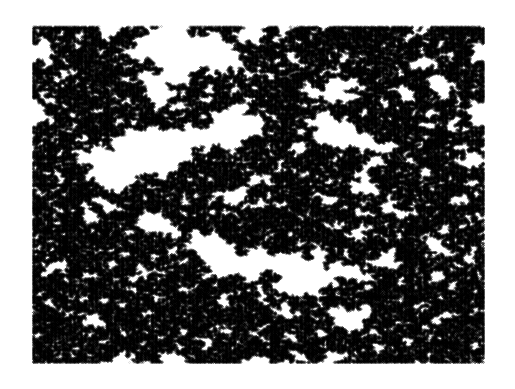

In [612]:
C = nx.Graph()
C.add_nodes_from(clusters[max_index[0]])

x, y = np.array(list(clusters[max_index[0]])).T[0], np.array(list(clusters[max_index[0]])).T[1]
plt.plot(x, y, 'o', markersize=1/np.log(m*n), color="k")
plt.axis("off")
plt.savefig("./figures/thermmodynamics_limit_grid.png")

In [621]:
def plot_grid_clusters(m, n, p, z):
    G = grid_percolation(m, n, p)
    clusters = list(nx.connected_components(G))
    indices = np.argsort([len(x) for x in clusters])
    sorted_indices = indices[::-1]
    sorted_clusters = np.array(clusters)[sorted_indices]
    color_list = []
    for i in range(len(sorted_clusters)):
        r, g, b = (i/len(clusters))**3, np.abs(np.sin(np.pi*i/2/len(clusters))), np.random.random()
        color_list.append((r, g, b))

    for i, cluster in enumerate(sorted_clusters):
        color = color_list[i]
        visted_nodes = []
        for c in cluster:
            visted_nodes.append(c)
            ax[z].plot(c[0], c[1], "o", color=color, markersize=4)
            for e in G.neighbors(c):
                if e not in visted_nodes:
                    x = []
                    y = []
                    n1, n2 = c, e
                    # if top row connect with the bottom row
                    if (n1[1] == 0 and n2[1] == n-1) or (n2[1] == 0 and n1[1] == n-1):
                        x.append(n1[0])
                        y.append(n1[1])
                        x.append(n1[0])
                        y.append(n1[1] + 1/2)

                        x.append(n2[0])
                        y.append(n2[1])   
                        x.append(n2[0])
                        y.append(n2[1] - 1/2)
                    # if the left column connect with the right column
                    elif (n1[0] == 0 and n2[0] == m-1) or (n2[0] == 0 and n1[0] == m-1):
                        x.append(n1[0])
                        y.append(n1[1])
                        x.append(n1[0] + 1/2)
                        y.append(n1[1])

                        x.append(n2[0])
                        y.append(n2[1])
                        x.append(n2[0] - 1/2)
                        y.append(n2[1])
                    
                    else:
                        x.append(n1[0])
                        y.append(n1[1])
                        x.append(n2[0])
                        y.append(n2[1])
                
                if len(x) > 3:
                    ax[z].plot(x[:2], y[:2], "-", color=color)
                    ax[z].plot(x[2:], y[2:], "-", color=color)
                else:
                    ax[z].plot(x, y, "-", color=color)
        ax[z].axis("off")


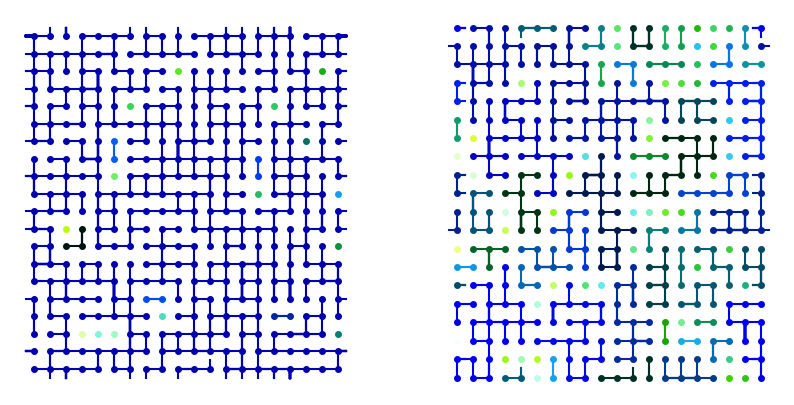

In [622]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

m, n, p = 20, 20, 0.4
plot_grid_clusters(m, n, p, 0)

m, n, p = 20, 20, 0.6
plot_grid_clusters(m, n, p, 1)

plt.savefig("./figures/grid_percolation_transition.png")

## Site percolation on a triangular lattice

In [532]:
def triangular_percolation(m, n, p, periodic=True, create_using=None):
    """Returns the triangular percolated graph
    
    The percolated graph disconnected edges by probability p

    Parameters
    ----------
    m, n : int or iterable container of nodes
        If an integer, nodes are from `range(n)`.
        If a container, elements become the coordinate of the nodes.
    
    p : int
        Each connected edges from the lattice has probability p
        to be removed.

    periodic : bool or iterable
        If `periodic` is True, both dimensions are periodic. If False, none
        are periodic.  If `periodic` is iterable, it should yield 2 bool
        values indicating whether the 1st and 2nd axes, respectively, are
        periodic.

    create_using : NetworkX graph constructor, optional (default=nx.Graph)
        Graph type to create. If graph instance, then cleared before populated.
    """
    G = nx.triangular_lattice_graph(m, n, periodic=False, create_using=None)
    for n in list(G.nodes):
        if np.random.random() < p:
            G.remove_node(n)
    return G


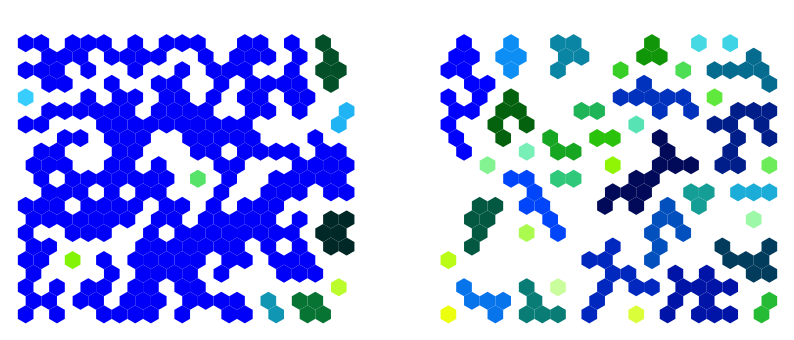

In [ ]:
from matplotlib import patches


def plot_triangular_percolation(G, m, n):
    fig, ax = plt.subplots()

    for key, value in enumerate(nx.get_node_attributes(G, "pos").items()):
        pos = list(list(value)[1])
        r = 1/np.sqrt(3)
        hexagon = patches.RegularPolygon(pos, 6, radius=r, facecolor="black")
        ax.add_patch(hexagon)
    ax.set_aspect('equal')
    ax.set_xlim(-1, n/2+1.5)
    ax.set_ylim(-1, m-1/2)
    ax.axis("off")


plot_triangular_percolation(G, m, n)


def plot_triangular_cluster(G, m, n, z):
    clusters = list(nx.connected_components(G))
    indices = np.argsort([len(x) for x in clusters])
    sorted_indices = indices[::-1]
    sorted_clusters = np.array(clusters)[sorted_indices]


    for i, c in enumerate(sorted_clusters):
        r, g, b = (i/len(clusters))**3, np.abs(np.sin(np.pi*i/2/len(clusters))), np.random.random()
        radius = 1/np.sqrt(3)
        for node in c:
            pos = nx.get_node_attributes(G, "pos")[node]
            hexagon = patches.RegularPolygon(pos, 6, radius=radius, facecolor=(r, g, b))
            ax[z].add_patch(hexagon)
    

    ax[z].set_aspect('equal')
    ax[z].set_xlim(-1, n/2+1.5)
    ax[z].set_ylim(-1, m-1/2)
    ax[z].axis("off")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

m, n, p = 20, 40, 0.4
G = triangular_percolation(m, n, p)
plot_triangular_cluster(G, m, n, 0)

m, n, p = 20, 40, 0.6
G = triangular_percolation(m, n, p)
plot_triangular_cluster(G, m, n, 1)

plt.savefig("./figures/triangular_percolation.png")

In [600]:
m, n, p = 1024, 2*1024, 0.5

G = triangular_percolation(m, n, p)
clusters = list(nx.connected_components(G))


max_val = 0
max_index = []
for i, j in enumerate(clusters):
    if len(j) > max_val:
        max_index = [i]
        max_val = len(j)
    elif len(j) == max_val:
        max_index.append(i)

print(max_val, max_index)

93211 [2097]


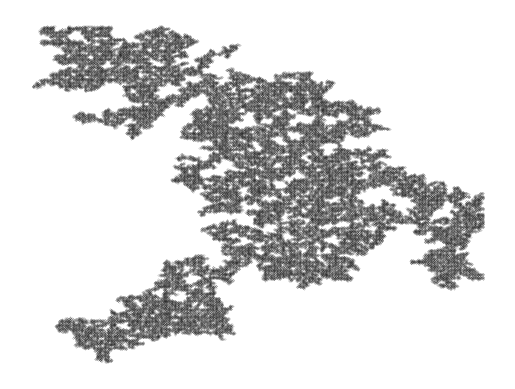

In [601]:
C = nx.Graph()
C.add_nodes_from(clusters[max_index[0]])

x, y = np.array(list(clusters[max_index[0]])).T[0], np.array(list(clusters[max_index[0]])).T[1]
plt.plot(x, y, 'o', markersize=1/np.log(m*n), color="k")
plt.axis("off")

plt.savefig("./figures/thermmodynamics_limit_triangular.png")